Denisa Alexandru

# 02.6 Clasificación - Ejercicio para entregar sobre variedades vínicolas


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import numpy as np

## Se va a utilizar un archivo con información de variedades vinícolas

In [3]:
# Se preparan las columnas a tratar
import pandas as pd
df_wine = pd.read_csv('data/wine.csv', header=None)
df_wine.columns = ['Class label', 'Alcohol',
    'Malic acid', 'Ash',
    'Alcalinity of ash',
    'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines'
    ,'Proline']
# Se borra la clase 1
df_wine = df_wine[df_wine['Class label'] != 1]
df_wine.head()
# Se toma el campo 'Class label' como variable objetivo y
# Se toman los campos 'Alcohol' y 'OD280/OD315 of diluted wines' como características sobre una matriz X
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values
np.unique(y)

array([2, 3], dtype=int64)

### Presentar una vista del dataframe cargado

In [80]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


### Preproceso de datos

__NOTA A sklearn.metrics__:__ Algunas métricas se definen esencialmente para tareas de clasificación binaria (por ejemplo, f1_score, roc_auc_score). En estos casos, por defecto solo se evalúa la etiqueta positiva, asumiendo por defecto que la clase positiva está etiquetada como 1 (aunque esto puede configurarse a través del __parámetro pos_label__).

Por lo tanto hay dos alternativas:

- __Se recodifica la variable objetivo y__, que contiene la etiqueta 'Class label' para que adopte los valores (0,1)
- __Este ejemplo se convierte en una clasificación binaria__, y se pueden mostrar sus métricas con sklearn.metrics

La otra posibilidad es:
- __No alterar los valores de y__
- Indicar en las llamadas a __sklearn.metrics__ en __pos_label__ la etiqueta que funciona como verdadero (3 por ejemplo).

__Y finalmente se trocea el conjunto de entrada en entrenamiento 80% y prueba 20%__

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(np.unique(y))

# Troceamos las caracteristicas de X en un 80% de entrenamiento y un 20% de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.80, random_state=0, stratify=y, shuffle=True)

[0 1]


### Hacer un entrenamiento con la clase GaussianNB que implementa naive-Bayes en sk-learn

- Entrenar el modelo con X_train, y_train
- Validar con X_test, y_test utilizando la librería sklearn.metrics. Al ser una clasificación binario se pueden obtener métricas tal como exactitud, precisión y sensibilidad
- Se puede verificar que la exactitud coincide con el recuento de aciertos

In [5]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred = clf_NB.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred)) #Hay que usar este código si es un clasificador binario
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Sensibilidad - Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Exactitud - Accuracy: 0.792
Precision: 0.727
Sensibilidad - Recall: 0.800
F1: 0.762


In [84]:
tot_Test = np.size(y_test)
tot_aciertos = 0
y_pred = []
for x, y in zip(X_test, y_test):
    y_est = clf_NB.predict([x])
    y_pred.append(y_est)
    if (y==y_est): tot_aciertos +=1
print('Exactitud del clasificador (porcentaje de aciertos) = %s \n' %(tot_aciertos*100/tot_Test))

Exactitud del clasificador (porcentaje de aciertos) = 79.16666666666667 



### Se muestra la correspondiente matriz de confusión

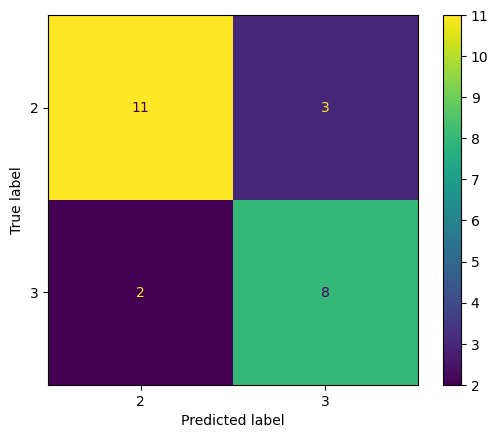

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['2','3']).plot()

### Repetir el entrenamiento con la clase  DecissionTreeClassifier que implementa el árbol de decisión en sk-learn

- Entrenar el modelo con X_train, y_train
- Validar con X_test, y_test utilizando la librería sklearn.metrics. 
- Matriz de confusión

In [86]:
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.80, random_state=0, stratify=y, shuffle=True)

In [87]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Sensibilidad - Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Exactitud - Accuracy: 0.792
Precision: 0.792
Sensibilidad - Recall: 0.792
F1: 0.792


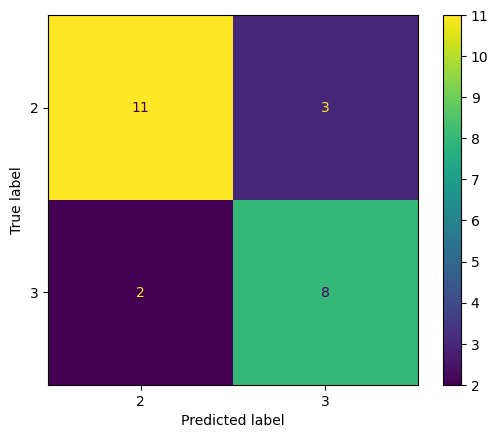

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['2','3']).plot()

### De forma volutaria, se puede buscar la documentación de la clase RandomForestClassifier

__Esta clase está implementada en la librería sklearn.ensemble__

__RamdomForest implementa internamente varios árboles de decisión que se ensamblan y se toma como resultado para la clasificación el voto mayoritario__

__Parámetros principales del constructor__:

- __n_estimators__ : número de árboles, 100 por defecto
- __criterion__ : criterio de partición ('gini', 'entropy'), por defecto es 'gini'.

Para más información:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(criterion='entropy', random_state=0)
clf_rfc.fit(X_train, y_train)
y_pred2=clf_rfc.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred2))
print('Sensibilidad - Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred2))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred2))

Exactitud - Accuracy: 0.750
Precision: 0.750
Sensibilidad - Recall: 0.750
F1: 0.750


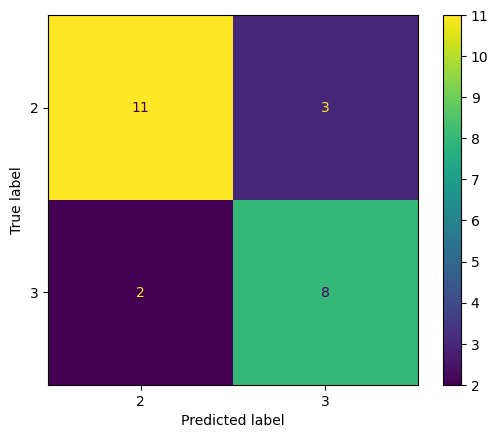

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['2','3']).plot()

### De forma voluntaria también se puede aplicar la implementación del Bagging

Se realizarán 100 repeticiones utilizando árboles de decisión

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bggC = BaggingClassifier(n_estimators=100)
bggC.fit(X_train, y_train)

BaggingClassifier(n_estimators=100)

__Ahora se hace uso de N clasificadores entrenados para predecir con voto mayoritario el conjunto de test__ 

__Se usa la moda como forma de obtener la etiqueta más votada__

In [97]:
print('Exactitud - Accuracy: %.4f' % bggC.score(X_test, y_test))

Exactitud - Accuracy: 0.7917


__Implementación manual del bagging__ 

In [98]:
import numpy as np
## Hacemos el entrenamiento de los clasificadores
NumRepeticiones = 100 # hacemos 100 muestras con bootstrap
NumMuestras = X_train.shape[0] # el número de muestras totales en X_train
indices = np.arange(X_train.shape[0]) # un listado con los índices de X_train 1,2,...,NumMuestras
clf_Bagg = [GaussianNB() for i in range(NumRepeticiones)]

for rep in np.arange(NumRepeticiones):
    indicesNew = np.random.choice(indices,NumMuestras,replace=True) #nuevos indices cogidos al azar
    X_train_Bagg = X_train[indicesNew] # tomamos los datos X de esos indices
    y_train_Bagg = y_train[indicesNew] # y sus categorías
    clf_Bagg[rep].fit(X_train_Bagg, y_train_Bagg)    

__Se usa la moda como forma de obtener la etiqueta más votada__

In [99]:
### ATENCIÓN: HAY QUE USAR EL VOTO MAYORITARIO, POR TANTO HAY QUE GUARDAR TODOS LOS VOTOS
from scipy import stats
from sklearn.metrics import accuracy_score
y_predMult = [clf_Bagg[rep].predict(X_test) for rep in range(NumRepeticiones)]
y_predVoto = stats.mode(y_predMult)[0][0]
print('Exactitud - Accuracy: %.4f' % accuracy_score(y_true=y_test, y_pred=y_predVoto))

Exactitud - Accuracy: 0.7917


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2420\2549440049.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_predVoto = stats.mode(y_predMult)[0][0]
